<a href="https://colab.research.google.com/github/tecnocrata/artificial-intelligence-course/blob/master/1.nlp/NLP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-Gramas

In [1]:
# Que es un n-grama
# Es una secuencia de n palabras consecutivas donde n>=2
# Bi-gramas de "Estoy aprendiendo cosas increibles" = (Estoy, aprendiendo); (aprendiendo, cosas); (cosas, increibles)
# Tri-gramas de la misma frase: (Estoy, aprendiendo, cosas); (aprendiendo, cosas , increibles)

# Colocaciones

In [2]:
# Las colocaciones de una palabra, son las ubicaciones que puede tomar la palabra por las caracteristicas del lenguaje, 
# sin seguir las reglas del lenguaje
# Por ejemplo, las siguientes frases
# Le dieron ganas de dormir 
# Le introdujeron ganas de dormir
# la palabra 'dieron' suena mejor que 'introdujeron', aunque la construccion de la oracion aparentemente no sigue una regla gramatical

In [3]:
# Otro tipo de colocacion es: Ventilar secretos
# Esto es como contar secretos
# Ventilar esta mal 'colocada' mal en ese lugar de acuerdo a la gramatica
# Pero por razones culturales, se acepta y se entiende el significado de la oracion completa.

In [4]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
# Permite crear graficos con los que podemos interactiar (zoom, ... etc)
import plotly.express as px


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [5]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [6]:
# Encontrando los bi-gramas
# Esto devuelve un objeto
bigrams(text1)
# Para visualizarlo en el book lo ponemos dentro de una lista
md_bigrams = list(bigrams(text1))

# Calculamos su distribucion de frecuencias
fdist = FreqDist(md_bigrams)

In [7]:
# Podemos obtener los bi-gramas mas frecuentes, como en NLP-2
fdist.most_common (10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

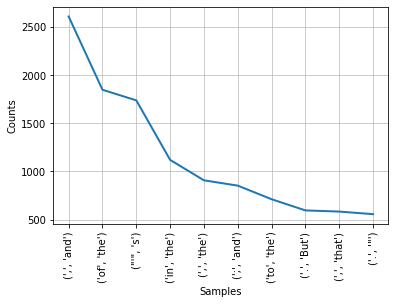

In [8]:
# Creamos un grafico que nos muestre como se ven esos bi-gramas
fdist.plot(10)

# Filtrando los bi-gramas

In [9]:
threshold=2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
# he filtrados los bigramas que tengan ambas palabras mayor a 2 caracteres
print(filtered_bigrams[:20])

# Creamos la distribucion sobre los bi-gramas filtrados
filtered_fdist = FreqDist(filtered_bigrams)
filtered_fdist.most_common(10)

[('Moby', 'Dick'), ('Herman', 'Melville'), ('Melville', '1851'), ('Late', 'Consumptive'), ('Consumptive', 'Usher'), ('Grammar', 'School'), ('The', 'pale'), ('pale', 'Usher'), ('and', 'brain'), ('see', 'him'), ('him', 'now'), ('was', 'ever'), ('ever', 'dusting'), ('dusting', 'his'), ('his', 'old'), ('old', 'lexicons'), ('lexicons', 'and'), ('and', 'grammars'), ('queer', 'handkerchief'), ('mockingly', 'embellished')]


[(('from', 'the'), 428),
 (('the', 'whale'), 369),
 (('and', 'the'), 357),
 (('with', 'the'), 308),
 (('for', 'the'), 285),
 (('into', 'the'), 246),
 (('the', 'ship'), 235),
 (('the', 'sea'), 223),
 (('upon', 'the'), 216),
 (('that', 'the'), 215)]

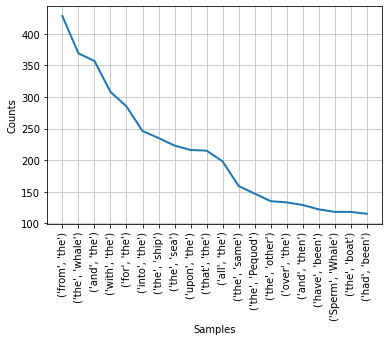

In [ ]:
# Generamos un grafico
filtered_fdist.plot(20)

# Tri-gramas


In [ ]:
# Importamos una utilidad para n-gramas
from nltk.util import ngrams
# Generando los tri-gramas
md_trigrams = list(ngrams (text1, 3))
trigrams_fdist = FreqDist (md_trigrams)
trigrams_fdist.most_common (10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

In [ ]:
threshold =2
# print (md_trigrams)
filtered_trigrams = [tri for tri in md_trigrams if len(tri[0])>threshold and len(tri[1])>threshold and len(tri[2])>threshold]
filtered_trigrams [:10]

[('Herman', 'Melville', '1851'),
 ('Late', 'Consumptive', 'Usher'),
 ('The', 'pale', 'Usher'),
 ('see', 'him', 'now'),
 ('was', 'ever', 'dusting'),
 ('ever', 'dusting', 'his'),
 ('dusting', 'his', 'old'),
 ('his', 'old', 'lexicons'),
 ('old', 'lexicons', 'and'),
 ('lexicons', 'and', 'grammars')]

# Colocaciones

In [ ]:
# Volvemos a definir 
md_bigrams = list(bigrams(text1))

In [ ]:
# Las colocaciones son secuencias de palabras que ocurren con una frecuencia inusualmente alta
threshold = 2
# Construyo una lista filtrada de los bigramas
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
# Creamos la distribucion
filtered_bigrams_fdist = FreqDist (filtered_bigrams)

# Los data-frame son conceptualemente como una hoja de calculo de excel, pero en su version python
# Data-Frame vacio
df = pd.DataFrame()

# Creamos una columna, esto se parece a un diccionario, pero no debe interpretarse de esa manera
# df['col1']
# Las filas de un data-frame estan definidas por los valores que coloquemos en una lista asignada a la columna
# df['col1'] = list('row1', 'row2')

# Finalmente construimos la columna bi_grams donde cada fila seran los bigramas
df['bi_grams'] = list(set(filtered_bigrams))
df

bi_grams
0      (ultimate, glassy)
1          (brigger, dan)
2          (two, hostile)
3            (the, rabid)
4           (thou, noble)
...                   ...
67937     (the, insanity)
67938   (every, distinct)
67939  (themselves, away)
67940         (much, and)
67941    (mistake, sends)

[67942 rows x 1 columns]

In [ ]:
# Agregamos 2 columnas por cada bigrama word_0 & word_1
# El contenido de la columna word_0 esta en funcion del contenido de la columna bi_grams, extrayendo la palabra 0 del bigrama
df ['word_0'] = df['bi_grams'].apply(lambda bigram: bigram[0])
# El contenido de la columna word_1 esta en funcion del contenido de la columna bi_grams, extrayendo la palabra 1 del bigrama
df ['word_1'] = df['bi_grams'].apply(lambda bigram: bigram[1])
df

bi_grams      word_0    word_1
0      (ultimate, glassy)    ultimate    glassy
1          (brigger, dan)     brigger       dan
2          (two, hostile)         two   hostile
3            (the, rabid)         the     rabid
4           (thou, noble)        thou     noble
...                   ...         ...       ...
67937     (the, insanity)         the  insanity
67938   (every, distinct)       every  distinct
67939  (themselves, away)  themselves      away
67940         (much, and)        much       and
67941    (mistake, sends)     mistake     sends

[67942 rows x 3 columns]

# Pointwise Mutual Information
En espanol la traduccion es: informacion Mutua Punto a punto.

Esta es la metrica que se usa oara encontrar colocaciones / collocations.

$$ PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right) $$

La formula esta basada en Probabilidades

$$ P(w1,w2) $$

Es la probabilidad de que un bigrama con palabras w1 y w2 aparezca, es decir es la frecuencia con que ese bigrama aparecera

$$ P(w1) P(w2) $$

Es la multiplicacion de la probabilidad de la aparicion de la primera palabra por la probabilidad de aparicion de la segunda palabra

In [ ]:
# Necesitamos las palabras filtradas
filtered_words = [word for word in text1 if len(word)> threshold]
# Creamos la distribucion de las palabras filtradas
filtered_words_fdist = FreqDist(filtered_words)

# Calculamos la frecuencia de aparicion del bigrama P(w1,w2)
df['bigram_freq'] = df['bi_grams'].apply(lambda b: filtered_bigrams_fdist[b])
# Calculamos la frecuencia de aparicion de la palabra 1 en el bigrama P(w1)
df['word_0_freq'] = df['word_0'].apply(lambda w0: filtered_words_fdist[w0])
# Calculamos la frecuencia de aparicion de la palabra 1 en el bigrama P(w2)
df['word_1_freq'] = df['word_1'].apply(lambda w1: filtered_words_fdist[w1])
df

bi_grams      word_0  ... word_0_freq  word_1_freq
0      (ultimate, glassy)    ultimate  ...           7            4
1          (brigger, dan)     brigger  ...           1            3
2          (two, hostile)         two  ...         285            3
3            (the, rabid)         the  ...       13721            1
4           (thou, noble)        thou  ...         232           44
...                   ...         ...  ...         ...          ...
67937     (the, insanity)         the  ...       13721            6
67938   (every, distinct)       every  ...         222           16
67939  (themselves, away)  themselves  ...          59          175
67940         (much, and)        much  ...         218         6024
67941    (mistake, sends)     mistake  ...           9            1

[67942 rows x 6 columns]

In [ ]:
# Ahora si podemos calcular el PMI
# yo pensaba que era: df['bigram_freq']/(df['word_0_freq']*df['word_1_freq'])
# pero es asi:
df['PMI'] = df[['bigram_freq','word_0_freq','word_1_freq']].apply (lambda tripleta: np.log2(tripleta.values[0]/(tripleta.values[1]*tripleta.values[2])), axis=1)
df

bi_grams      word_0  ... word_1_freq        PMI
0      (ultimate, glassy)    ultimate  ...           4  -4.807355
1          (brigger, dan)     brigger  ...           3  -1.584963
2          (two, hostile)         two  ...           3  -9.739781
3            (the, rabid)         the  ...           1 -13.744098
4           (thou, noble)        thou  ...          44 -13.317413
...                   ...         ...  ...         ...        ...
67937     (the, insanity)         the  ...           6 -16.329061
67938   (every, distinct)       every  ...          16 -11.794416
67939  (themselves, away)  themselves  ...         175 -13.333854
67940         (much, and)        much  ...        6024 -20.324690
67941    (mistake, sends)     mistake  ...           1  -3.169925

[67942 rows x 7 columns]

In [ ]:
# Ahora mostraremos una grafica, para poder entender las colocaciones
# Ordenamos los valores ascendentemente en funcion de la columna PMI
#df.sort_values(by='PMI', ascending=False)
df.sort_values(['PMI'], ascending=False, inplace=True)
df

# Estamos buscando valores 'grandes' que para nosotros son valores 0 o muy cercanos a 0
# otra forma de verlo, es un valor lo MENOS negativo posible

bi_grams      word_0  ... word_1_freq        PMI
20345   (CONTINUES, SNEEZING)   CONTINUES  ...           1   0.000000
11537  (thickening, clusters)  thickening  ...           1   0.000000
40310    (Arkansas, duellist)    Arkansas  ...           1   0.000000
11242          (SMALL, SIZED)       SMALL  ...           1   0.000000
46652   (Magnitude, Diminish)   Magnitude  ...           1   0.000000
...                       ...         ...  ...         ...        ...
44272              (man, the)         man  ...       13721 -22.732783
43667             (some, the)        some  ...       13721 -22.919024
28869              (one, the)         one  ...       13721 -23.540138
58432              (the, not)         the  ...        1103 -23.851315
30808              (the, but)         the  ...        1113 -23.864336

[67942 rows x 7 columns]

In [ ]:
# Hasta aqui observamos que los valores con PMI->0 tienen una frecuencia muy baja (1)
# Entonces para identificar las colocaciones, no solo debemos basarnos en el PMI sino tambien en su frecuencia
# Vamos a graficar el PMI y la frecuencia del bigrama, pero antes tenemos que 'normalizar' la columna bigram_freq agregando:
df['log(bigram_freq)'] = df['bigram_freq'].apply(lambda f: np.log2(f))
df

bi_grams      word_0  ...        PMI  log(bigram_freq)
20345   (CONTINUES, SNEEZING)   CONTINUES  ...   0.000000               0.0
11537  (thickening, clusters)  thickening  ...   0.000000               0.0
40310    (Arkansas, duellist)    Arkansas  ...   0.000000               0.0
11242          (SMALL, SIZED)       SMALL  ...   0.000000               0.0
46652   (Magnitude, Diminish)   Magnitude  ...   0.000000               0.0
...                       ...         ...  ...        ...               ...
44272              (man, the)         man  ... -22.732783               0.0
43667             (some, the)        some  ... -22.919024               0.0
28869              (one, the)         one  ... -23.540138               0.0
58432              (the, not)         the  ... -23.851315               0.0
30808              (the, but)         the  ... -23.864336               0.0

[67942 rows x 8 columns]

In [ ]:
# Usaremos plotlib-express
# scatter = grafico de dispercion
fig = px.scatter(x=df['PMI'].values, y=df['log(bigram_freq)'].values, color=df['PMI']+df['log(bigram_freq)'], hover_name=df['bi_grams'].values,width=600,height=600,labels={'x':'PMI','y':'log(bigram_freq)'})
fig.show()

# Analizando el siguiente grafico vemos que las colocaciones son los bigramas que estan mas cercanos a cero
# En otras palablas los puntos mas a la derecha y mas arriba
# El bigrama Moby Dick es el bigrama que tiene una frecuencia de aparicion inusualmente alta
# CONCLUSION --> Las colocaciones sirven para identificar: personas importantes, objetos, nombres-propios, lugares importantes en un documento.
# CONCLUSION --> Entonces a partir de esas colocaciones, podemos empezar a asignar etiquetas a esos elementos que nos pueden dar informacion de elementos cruciales
# CONCLUSION --> en el entendimiento del texto
# Por ejemplo: Moby Dick es el nombre mas importante del libro, New Belford es otro nombre propio que aparece en el texto, es el capitan del barco!

In [ ]:
# Ahora veremos como con el uso de NLTK se puede hacer TODO el proceso anterior de identificacion de colocaciones de manera mas simple
from nltk.collocations import *
# Obtenemos un metodo que
bigram_measures = nltk.collocations.BigramAssocMeasures()
# Es un metodo que nos permite encontrar las colocaciones
finder = BigramCollocationFinder.from_words(text1)
# Podemos aplicar tambien un filtro a las frecuencias
# Aqui estamos diciendo que todos los bigramas con una frequencia <20 no se consideran!
finder.apply_freq_filter (min_freq=20)
# Que se busque las 10 mejores colocaciones usando la formula PMI
finder.nbest(bigram_measures.pmi, 10)
# El resultado es el mismo que se observa en el anterior grafico de dispersion

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

In [ ]:
# Intentemos encontrar colocaciones en textos en espaniol
# Usaremos el corpus de titulares de noticias en espaniol https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download ('cess_esp')
corpus_es = nltk.corpus.cess_esp.sents()
corpus_es
# Esta es una lista de titulares tokenizados, que vimos anteriormente

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]

In [ ]:
# Con esto convertimos la lista de listas anterior en una sola linea plana
flatten_corpus = [w for l in corpus_es for w in l]
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
# Ahora encontramos las colocaciones
# Ahora usamos from_documents, porque la entrada es diferente!?
#finder = BigramCollocationFinder.from_documents(corpus_es)
finder = BigramCollocationFinder.from_words(flatten_corpus)
# Podemos aplicar tambien un filtro a las frecuencias
# Aqui estamos diciendo que todos los bigramas con una frequencia <10 no se consideran!
finder.apply_freq_filter (min_freq=10)
# Que se busque las 10 mejores colocaciones usando la formula PMI
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]